# Titanic Survivorship Data

On April 15, 1912, Titanic sank after colliding with an iceberg. 1502 out of 2224 souls on board perished in the incident. The survivorship data contain information about 891 passengers. Less than 40% of the passengers in the data set survived.

This analysis focus primarily on the how various factors might improve someone's survival chances in a disaster like the sinking of the Titanic. Does having close relations who can help improve one's odds, can having existing resources help to save oneself from disaster, or, perhaps, is one's lucky of being at the right spot at the right time all that matters?

In [1]:
# Standard imports and boilerplate

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Helper Function

def survival_rate(df):
    return df["Survived"].sum() / len(df) 

In [2]:
# Read in the Titanic Data

titanic_pd = pd.read_csv("titanic-data.csv")
print(titanic_pd.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


According to the Kaggle website, the columns are defined as follows:
    
    PassengerId - Unique ID for passengers
    Survived - 0->no, 1->yes
    Pclass - Approximate social-economic status
    Name - Name of passenger
    Sex - Sex
    Age - Age in years
    SibSp - # of siblings or spouses on board
    Parch - # of parents or children on board
    Ticket - Ticket number
    Fare - Passenger fare
    Cabin - Cabin number if applicable, NaN otherwise
    Embarked - Port of embarkasion

Special Definitions

    Pclass - 1 = upper, 2 = middle, 3 = lower
    SibSp - brothers/sisters/stepsiblings/husbands/wifes (mistress/fiances are ignored)
    Parch - mother/father/daughter/son/step-daughter/step-son (nannies are ignored)
    
https://www.kaggle.com/c/titanic/data

In [3]:
#Initial look at the data

print(titanic_pd.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# From the above, there are clearly NaN values in Cabin column.
# To remove all NaN in the data, let's find the columns that contain NaN

for col in titanic_pd.columns:
    for e in titanic_pd[col].isnull():
        if e == True:
            print(col)
            break

Age
Cabin
Embarked


In [12]:
# Deal with NaN in Age
# Change NaN in Age to 0 to indicate missing age information.
# Babies with age less than 1 have fractional ages.

titanic_pd["Age"].fillna(value=0);

In [6]:
# Deal with NaN in Cabin

# Without knowing more, the cabin number does not provide more info
# beyond someone having a cabin, which is all I need for my analysis.
# Change value to 1 to reflect the passenger having a cabin
# Change value to 0 to reflect the passenger not having a cabin

# Most people do not have a cabin, thus most likely people with NaN 
# value for their cabin information do not have a cabin. For simplicity,
# I will assume that people with NaN in their cabin data do not have
# cabins, and set their values to 0.

titanic_pd["Cabin"] = titanic_pd["Cabin"].notnull().astype("int");

In [13]:
# Deal with NaN in Embarked
# Change NaN in Embarked to 0 to represent no knowledge of the port of embarkation
# Port of embarkation is also uninteresting for my analysis

titanic_pd["Embarked"].fillna(value=0);

Total Passengers in Data Set: 891
Overall Survivorship: 38.4%
Possible Factors:
	PassengerId
	Survived
	Pclass
	Name
	Sex
	Age
	SibSp
	Parch
	Ticket
	Fare
	Cabin
	Embarked


[Text(0,0.5,'Survivorship (1 = Survived, 0 = Perished)'),
 Text(0.5,0,'Number of Survivors')]

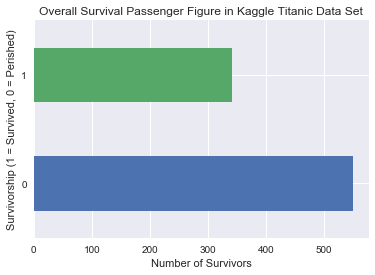

In [8]:
# Looking at the data
overall_survival = survival_rate(titanic_pd)

print("Total Passengers in Data Set:", len(titanic_pd))
print("Overall Survivorship:", str(round(overall_survival, 3)*100)+"%")
print("Possible Factors:")
for col in titanic_pd.columns:
    print("\t"+col)

%matplotlib inline
graph_title = "Overall Survival Passenger Figure in Kaggle Titanic Data Set"
titanic_pd.groupby("Survived").size().plot(kind="barh",
                                           title=graph_title).set(xlabel="Number of Survivors",
                                                                  ylabel="Survivorship (1 = Survived, 0 = Perished)")

Number of passengers with at least one sibling or spouse: 283
Survivor Rate: 0.466431095406

Number of passengers with no sibling or spouse: 608
Survivor Rate: 0.345394736842



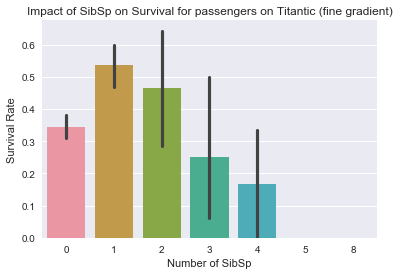

In [9]:
# Does having a close relation such as a parent/child or sibling/spouse
# improve the odds?
# I am going to look at the SibSp and Parch for this information.
# First let's look at the SibSp

has_sibsp_pd = titanic_pd[titanic_pd["SibSp"] > 0]
no_sibsp_pd = titanic_pd[titanic_pd["SibSp"] == 0]
has_sibsp_survival = survival_rate(has_sibsp_pd)
no_sibsp_survival = survival_rate(no_sibsp_pd)
print("Number of passengers with at least one sibling or spouse:",
      len(has_sibsp_pd))
print("Survivor Rate:", has_sibsp_survival)
print()
print("Number of passengers with no sibling or spouse:",
      len(no_sibsp_pd))
print("Survivor Rate:", no_sibsp_survival)
print()

%matplotlib inline
plt.title("Impact of SibSp on Survival for passengers on Titantic (fine gradient)")
sns.barplot(x="SibSp", y="Survived", data=titanic_pd).set(xlabel='Number of SibSp', ylabel='Survival Rate')
plt.show()

Number of passengers with at least one parent/child on board: 213
Survivor Rate: 0.511737089202
Number of passengers with no parent/child on board: 678
Survivor Rate: 0.343657817109


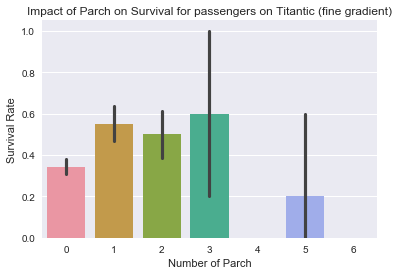

In [10]:
# Let's look at the ParCh

has_parch_pd = titanic_pd[titanic_pd["Parch"] > 0]
has_parch_survival = survival_rate(has_parch_pd)
no_parch_pd = titanic_pd[titanic_pd["Parch"] == 0]
no_parch_survival = survival_rate(no_parch_pd)

print("Number of passengers with at least one parent/child on board:",
      len(has_parch_pd))
print("Survivor Rate:", has_parch_survival)
print("Number of passengers with no parent/child on board:",\
      len(no_parch_pd))
print("Survivor Rate:", no_parch_survival)

%matplotlib inline
plt.title("Impact of Parch on Survival for passengers on Titantic (fine gradient)")
sns.barplot(x="Parch", y="Survived", data=titanic_pd).set(xlabel='Number of Parch', ylabel='Survival Rate')
plt.show()

In [19]:
# Does having additional resources such as being male
# (potentially physically stronger) or having wealth improve the odds?
# I am going to look at the Sex and Pclass columns for this information.

male_passengers_pd = titanic_pd[titanic_pd["Sex"] == "male"]
female_passengers_pd = titanic_pd[titanic_pd["Sex"] == "female"]

first_class_pd = titanic_pd[titanic_pd["Pclass"] == 1]
first_class_male_pd = male_passengers_pd[male_passengers_pd["Pclass"] == 1]
first_class_female_pd = female_passengers_pd[female_passengers_pd["Pclass"] == 1]

second_class_pd = titanic_pd[titanic_pd["Pclass"] == 2]
second_class_male_pd = male_passengers_pd[male_passengers_pd["Pclass"] == 2]
second_class_female_pd = female_passengers_pd[female_passengers_pd["Pclass"] == 2]

third_class_pd = titanic_pd[titanic_pd["Pclass"] == 3]
third_class_male_pd = male_passengers_pd[male_passengers_pd["Pclass"] == 3]
third_class_female_pd = female_passengers_pd[female_passengers_pd["Pclass"] == 3]

print("Number of male passengers:",len(male_passengers_pd))
print("Survival Rate:", survival_rate(male_passengers_pd))
print()

print("Number of female passengers:",len(female_passengers_pd))
print("Survival Rate:", survival_rate(female_passengers_pd))
print()

print("Number of passengers in first class:", len(first_class_pd))
print("Males:", len(first_class_male_pd))
print("Females:", len(first_class_female_pd))
print("Overall Survival Rate:", survival_rate(first_class_pd))
print("Male survival rate in first class:", survival_rate(first_class_male_pd))
print("Female survival rate in first class:", survival_rate(first_class_female_pd))
print()

print("Number of passengers in second class:", len(second_class_pd))
print("Males:", len(second_class_male_pd))
print("Females:", len(second_class_female_pd))
print("Overall Survival Rate:", survival_rate(second_class_pd))
print("Male survival rate in second class:", survival_rate(second_class_male_pd))
print("Female survival rate in second class:", survival_rate(second_class_female_pd))
print()

print("Number of passengers in third class:", len(third_class_pd))
print("Males:", len(third_class_male_pd))
print("Females:", len(third_class_female_pd))
print("Overall Survival Rate:", survival_rate(third_class_pd))
print("Male survival rate in third class:", survival_rate(third_class_male_pd))
print("Female survival rate in third class:", survival_rate(third_class_female_pd))
print()

Number of male passengers: 577
Survival Rate: 0.188908145581

Number of female passengers: 314
Survival Rate: 0.742038216561

Number of passengers in first class: 216
Males: 122
Females: 94
Overall Survival Rate: 0.62962962963
Male survival rate in first class: 0.368852459016
Female survival rate in first class: 0.968085106383

Number of passengers in second class: 184
Males: 108
Females: 76
Overall Survival Rate: 0.472826086957
Male survival rate in second class: 0.157407407407
Female survival rate in second class: 0.921052631579

Number of passengers in third class: 491
Males: 347
Females: 144
Overall Survival Rate: 0.242362525458
Male survival rate in third class: 0.135446685879
Female survival rate in third class: 0.5



Number of passengers with a cabin: 204
Survival Rate: 0.666666666667

Number of passengers without a cabin: 687
Survival Rate: 0.299854439592



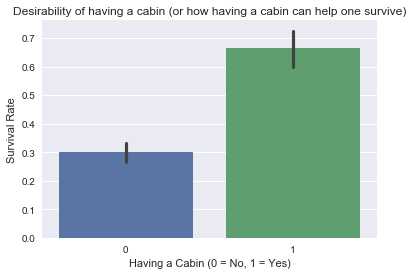

In [25]:
# Does having one's sleeping quarters on particular areas on the ship help with survival?
# I am going to use Cabin information for this information.
# Since I don't have a map of the ship that would show where the cabins are located,
# I'll just use cabin as a generally more desirable place to live, and an indicator for wealth,
# or having othe resources

has_cabin_pd = titanic_pd[titanic_pd["Cabin"] == 1]
no_cabin_pd = titanic_pd[titanic_pd["Cabin"] == 0]

print("Number of passengers with a cabin:", len(has_cabin_pd))
print("Survival Rate:", survival_rate(has_cabin_pd))
print()

print("Number of passengers without a cabin:", len(no_cabin_pd))
print("Survival Rate:", survival_rate(no_cabin_pd))
print()

%matplotlib inline
plt.title("Desirability of having a cabin (or how having a cabin can help one survive)")
sns.barplot(x="Cabin", y="Survived", data=titanic_pd).set(xlabel='Having a Cabin (0 = No, 1 = Yes)',
                                                          ylabel='Survival Rate')
plt.show()

# Conclusion

There were 2224 souls on board of Titanic when it sank. However, there is only data for 891 of them in this data set. Any conclusions drawn based only on this data set would be suspect, since the fates for more than half of the souls on board of the Titanic are not contained in this data set. However, if this is all the information that can be had, it can still serve to point out interesting survivorship trends. If the 891 data points are randomly drawn from a data set containing everyone on board of Titanic, it might still serve as a representative example.

Among the various factors analyzed, being a woman correlated most highly with being a survivor from the sinking of the Titanic. Having wealth, having strong social connections, and having more favorable living accommodations--the Titanic hit the iceberg in the middle of the night, and presumably most people would be in their living quarters at that time--all improved one's odd of survival. Being from the first class in society drastically increased one's odds of survival. Having a cabin on board doubles one's chance of living through the sinking of the Titanic. However, the seemingly neglible factor of one's sex seems to drastically increase one's chance. Among the 314 female passengers, approximately 74% survived, while only approximately 19% among the male passengers did.

Combined with information obtained from other analyses, an interesting picture seems to emerge. Most of the survivors are women. They probably had their family around them--their siblings, spouses and/or children. Most of these family groups would be relatively well off. Many of them survived. Conversely, those who perished in the disaster are much more likely to be unattached men from a poorer socioeconomic background. 

Based on the initial analysis, it seems that social forces shape the destiny of the people even under the dire circumstances of the sinking of an ocean liner. Next step of the analysis would be to isolate the impact that each factor has on survivorship, and see if there are any combination affects that produce a greater impact than expected. 